In [1]:
# import analysis library
import pandas as pd, numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')

from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


## Task 1

In [87]:
df_task1 = pd.read_excel('Task1.xlsx')

In [91]:
df_task1 = df_task1.iloc[:,0:4]

In [94]:
df_task1.Country.value_counts()

Ofu              27279
Aunuu            20113
Tau              17632
Olosega          15835
Rose Atoll       14740
Swains Island    12918
Name: Country, dtype: int64

In [102]:
df1_pivot= pd.pivot_table(df_task1, 
               columns='Country',
               index='Group',
               values='Activity',
               aggfunc=sum)
df1_pivot

Country,Aunuu,Ofu,Olosega,Rose Atoll,Swains Island,Tau
Group,,,,,,
1,2.375975e+07,4.215286e+07,1.621295e+07,1.808102e+07,2.201747e+07,3.571487e+07
2,2.669774e+07,3.595718e+07,1.281764e+07,1.700439e+07,1.920122e+07,3.146137e+07
3,2.951242e+07,4.144794e+07,1.325083e+07,1.684552e+07,2.009137e+07,3.832759e+07
4,2.426316e+07,3.527395e+07,1.248854e+07,1.638039e+07,2.139589e+07,3.146947e+07
5,2.200553e+07,4.008657e+07,1.157133e+07,1.473324e+07,1.321437e+07,3.327539e+07


([<matplotlib.axis.XTick at 0x10bdc1748>,
 <a list of 5 Text xticklabel objects>)

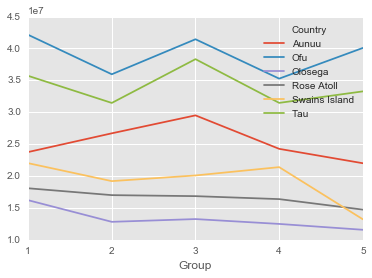

In [127]:
new_ticks = np.arange(1,6)
df1_pivot.plot()
plt.xticks(new_ticks)

In [93]:
df_task1.groupby('Group').sum()

,PlayerID,Activity
Group,,
1,1590112960,1.579389e+08
2,1558904421,1.431395e+08
3,1559523965,1.594757e+08
4,1562511376,1.412714e+08
5,1560183827,1.348864e+08


In [114]:
np.arange(1,6)

array([1, 2, 3, 4, 5])

## Task 2

In [70]:
df_display = pd.read_excel('Task2.xlsx',sheetname=0)

In [71]:
df_promotions = pd.read_excel('Task2.xlsx',sheetname=1)

In [73]:
df_merge = df_display.merge(df_promotions, on='Date')
df_merge = df_merge.fillna('NA')

In [74]:
def weekday(x):
    if x== 0:
        return 'Monday'
    if x== 1 :
        return 'Tuesday'
    if x== 2 :
        return 'Wednesday'
    if x== 3 :
        return 'Thursday'
    if x== 4 :
        return 'Friday'
    if x== 5 :
        return 'Saturday'
    if x== 6 :
        return 'Sunday'


In [75]:
# The day of the week with Monday=0, Sunday=6

df_merge.loc[:, 'weekday'] = df_merge['Date'].dt.weekday
df_merge.loc[:, 'weekday_'] = df_merge['weekday'].map(lambda x: weekday(x) )


In [129]:
from sklearn.linear_model import LinearRegression

def linear_model(playercount,df,Promo,weekday):
    df_ = df.copy()
    df__ = df_[(df_.Promo ==Promo)&(df_.weekday_ ==weekday)]
    # aggregrate data 
    df__ = df__.groupby('Date').agg({'Playerid':'count', 'Revenue': 'sum'}).reset_index()
    df__.columns = ['date', 'players','revenue']
    # train with linear model  
    regr = LinearRegression()
    regr.fit(df__.iloc[:,1:2].values,df__.iloc[:,2:3].values)
    print (regr)
    # predict with linear model  
    predict = regr.predict(playercount)
    return predict
      

In [134]:
linear_model(3000,df_merge,'NA','Monday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 554.65270593]])

In [135]:
linear_model(4000,df_merge,'A','Tuesday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 807.61673678]])

In [136]:
linear_model(6000,df_merge,'A','Wednesday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 700.8955393]])

In [137]:
linear_model(5000,df_merge,'B','Thursday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 945.28668844]])

In [132]:
linear_model(6000,df_merge,'A','Friday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 1243.2655368]])

In [138]:
linear_model(6000,df_merge,'B','Saturday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 1277.17164676]])

In [139]:
linear_model(7000,df_merge,'NA','Sunday')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


array([[ 1188.16020712]])

In [85]:
"""
df_x = df_merge[(df_merge.Promo =='A')
         &(df_merge.weekday_ =='Tuesday')]

df_x_ = df_x.groupby('Date').agg({'Playerid':'count', 'Revenue': 'sum'}).reset_index()

df_x_.columns = ['date', 'players','revenue']
df_x_
"""

"\ndf_x = df_merge[(df_merge.Promo =='A')\n         &(df_merge.weekday_ =='Tuesday')]\n\ndf_x_ = df_x.groupby('Date').agg({'Playerid':'count', 'Revenue': 'sum'}).reset_index()\n\ndf_x_.columns = ['date', 'players','revenue']\ndf_x_\n"

In [86]:
#regr.predict(23423)

## Task 3

VIP is the most value users to company, can use folllowing metrics 
target/seperate them from mass players.

-Metrics
    - Profit
        - Total pay amounts 
        - Total buy credits 
    - Recency
        - When user last pay 
        - When user last buy credits
        - When user last login
        - When user last open the APP
    - Frequency
        - How often user pay 
        - How often user buy credits
        - How often user login
        - How often user open the APP
    - Others 
        - Top weekly pay users 
        - User who bought some very expensive credicts/products 
        
- Data Prepare 
    - Profit : 
    Create user profile table, update total pay/buy amount 
    for every users every period 
    - Recency :
    Create user log table, tracking all user events: pay/buy/login/open APP
    - Frequency : Using SQL, query user log table above, can get the needed values
    
- Approach 
    - Using classfication models like KNN/Kmeans get factors from similar users then doiing further classifications 